In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 
data = pd.read_csv('credit_card_fraud.csv')
data.head(20)

,Transaction_Amount,Transaction_Time,Transaction_Type,Account_Age,Location_Match,Device_Suspicion_Score,Merchant_Risk_Score,Previous_Fraud_Flag,Fraud_Label
0,2.503226,-2.871779,-2.470088,-1.638576,0.490058,0.996429,0.578471,-1.230584,0
1,2.228437,0.170056,2.006130,-5.195173,-1.402124,3.178939,1.230778,-0.584437,0
2,1.152453,-1.858255,-1.925113,-0.154169,1.605876,0.915083,0.335370,0.742974,0
3,4.233681,-2.383255,-2.204346,-7.811528,-2.041393,2.530924,-1.555732,-0.787970,0
4,0.323402,0.254349,0.178456,-2.024740,0.483426,1.977942,-0.188721,1.387828,0
5,1.886949,0.740227,2.352352,-4.345287,-0.015210,2.017892,0.106648,0.950075,1
6,0.791744,-2.329990,-2.909092,1.120462,0.747562,-0.407317,0.137458,-1.074884,0
7,1.868717,-0.113116,-0.167720,-5.667541,-0.043946,3.226597,-1.257135,-0.679787,0
8,1.683445,-2.880175,-1.827176,1.359201,0.569067,0.023228,2.337878,1.229215,0
9,1.623972,-1.189439,-0.933255,-1.237365,2.700569,0.789965,-0.652586,0.457542,1


In [3]:
# Basic Information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_Amount      10000 non-null  float64
 1   Transaction_Time        10000 non-null  float64
 2   Transaction_Type        10000 non-null  float64
 3   Account_Age             10000 non-null  float64
 4   Location_Match          10000 non-null  float64
 5   Device_Suspicion_Score  10000 non-null  float64
 6   Merchant_Risk_Score     10000 non-null  float64
 7   Previous_Fraud_Flag     10000 non-null  float64
 8   Fraud_Label             10000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 703.3 KB


#### Data Cleaning and Preprocessing 

In [4]:
data.isnull().sum()

Transaction_Amount        0
Transaction_Time          0
Transaction_Type          0
Account_Age               0
Location_Match            0
Device_Suspicion_Score    0
Merchant_Risk_Score       0
Previous_Fraud_Flag       0
Fraud_Label               0
dtype: int64

In [5]:
data.duplicated().sum()

0

#### Statistical Analysis 

<function matplotlib.pyplot.show(close=None, block=None)>

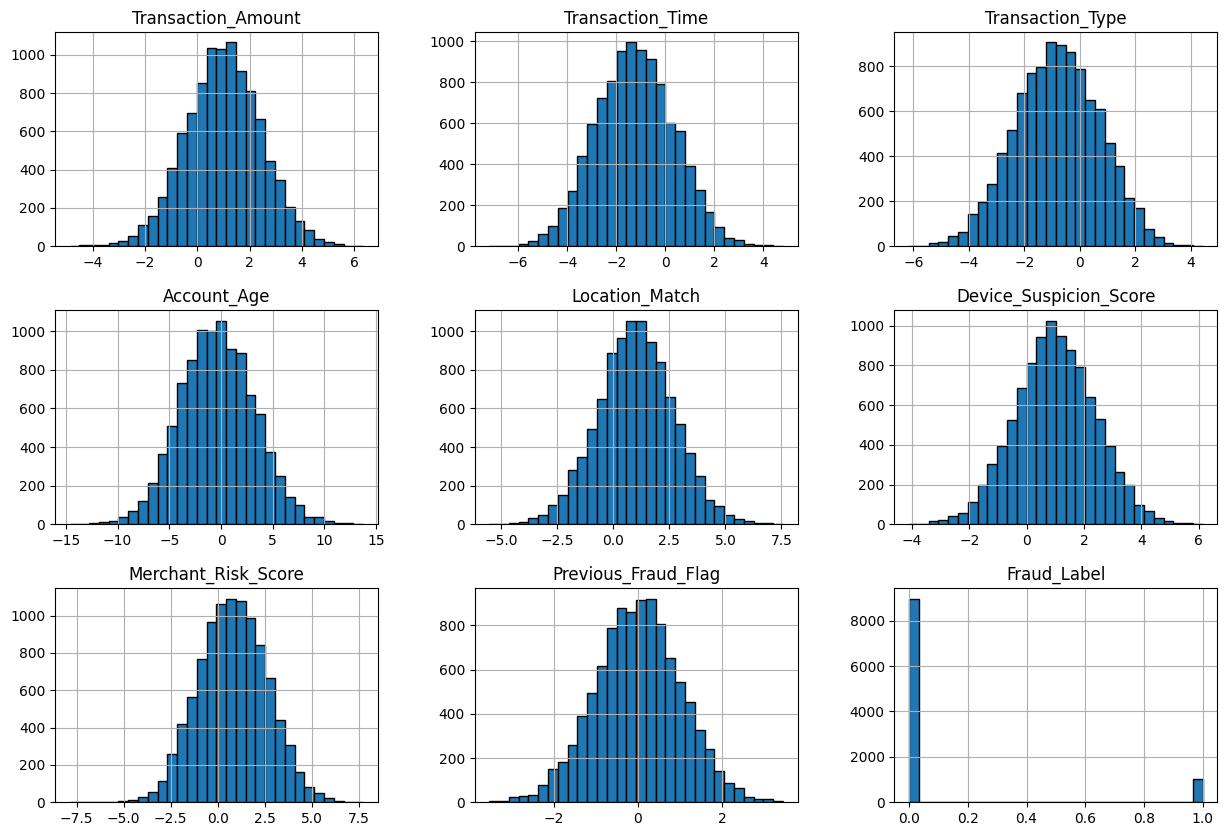

In [6]:
# plot to check features distribution in the dataset
data.hist(bins=30,edgecolor='black',figsize=(15,10))
plt.show

In [7]:
# checking for skewness 
data.skew()

Transaction_Amount       -0.041576
Transaction_Time          0.048892
Transaction_Type         -0.038937
Account_Age               0.087354
Location_Match            0.021045
Device_Suspicion_Score    0.001705
Merchant_Risk_Score       0.035841
Previous_Fraud_Flag      -0.027732
Fraud_Label               2.609031
dtype: float64

As seen from the data distribution of the fraud_label column, the skewness is as a result of the imbalanced between the fraud and non fraud transactions.

#### Data Visualization 

Fraud_Label
0    0.8968
1    0.1032
Name: proportion, dtype: float64


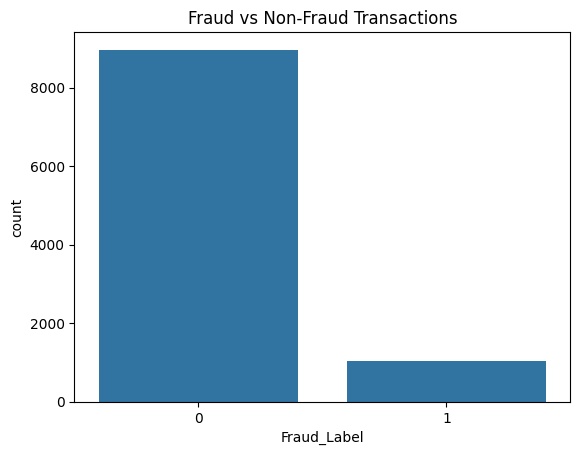

In [8]:
# Check class imbalance
fraud_distribution = data['Fraud_Label'].value_counts(normalize=True)
print(fraud_distribution)

# Plot the class imbalance
sns.countplot(x='Fraud_Label', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

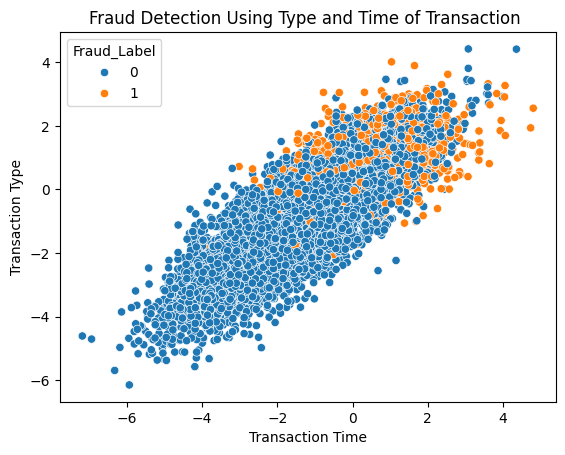

In [9]:
# Fraud detection using type and time of transaction 
sns.scatterplot(x=data['Transaction_Time'], y=data['Transaction_Type'], hue=data['Fraud_Label'])
plt.title('Fraud Detection Using Type and Time of Transaction ')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Type')
plt.show()

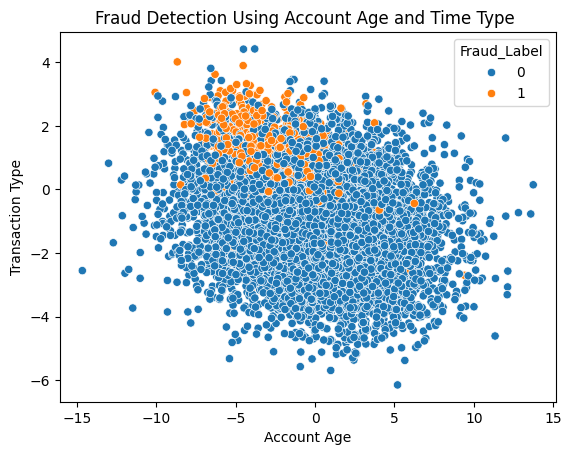

In [10]:
# Fraud detection using type and time of transaction 
sns.scatterplot(x=data['Account_Age'], y=data['Transaction_Type'], hue=data['Fraud_Label'])
plt.title('Fraud Detection Using Account Age and Time Type ')
plt.xlabel('Account Age')
plt.ylabel('Transaction Type')
plt.show()

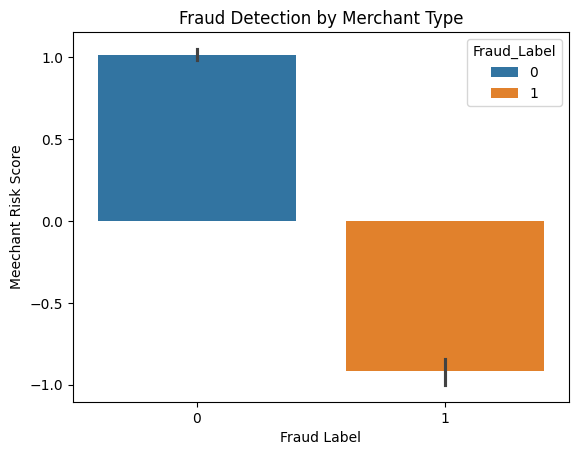

In [11]:
# Fraud detection by Merchant Type  
sns.barplot(x=data['Fraud_Label'], y=data['Merchant_Risk_Score'], hue=data['Fraud_Label'])
plt.title('Fraud Detection by Merchant Type')
plt.xlabel('Fraud Label')
plt.ylabel('Meechant Risk Score')
plt.show()

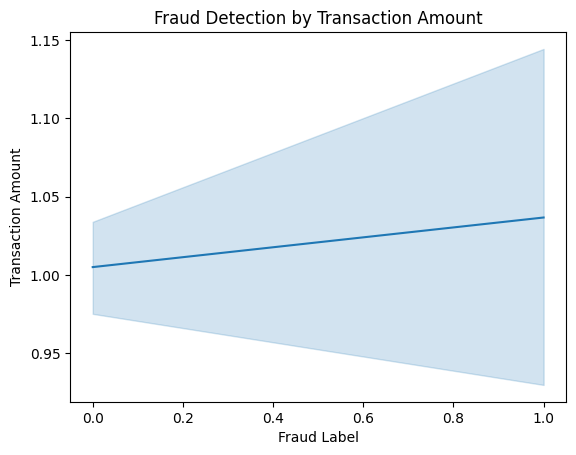

In [12]:
# Fraud detection by Merchant Type  
sns.lineplot(x=data['Fraud_Label'], y=data['Transaction_Amount'])
plt.title('Fraud Detection by Transaction Amount')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')
plt.show()

#### Features Selection 

* 1) Correlation With Target Variable 

In [13]:
target_corr = data.corr()['Fraud_Label'].sort_values(ascending=False)
target_corr

Fraud_Label               1.000000
Transaction_Type          0.385226
Transaction_Time          0.365525
Previous_Fraud_Flag       0.025037
Location_Match            0.009859
Transaction_Amount        0.006743
Device_Suspicion_Score    0.006564
Account_Age              -0.208868
Merchant_Risk_Score      -0.326102
Name: Fraud_Label, dtype: float64

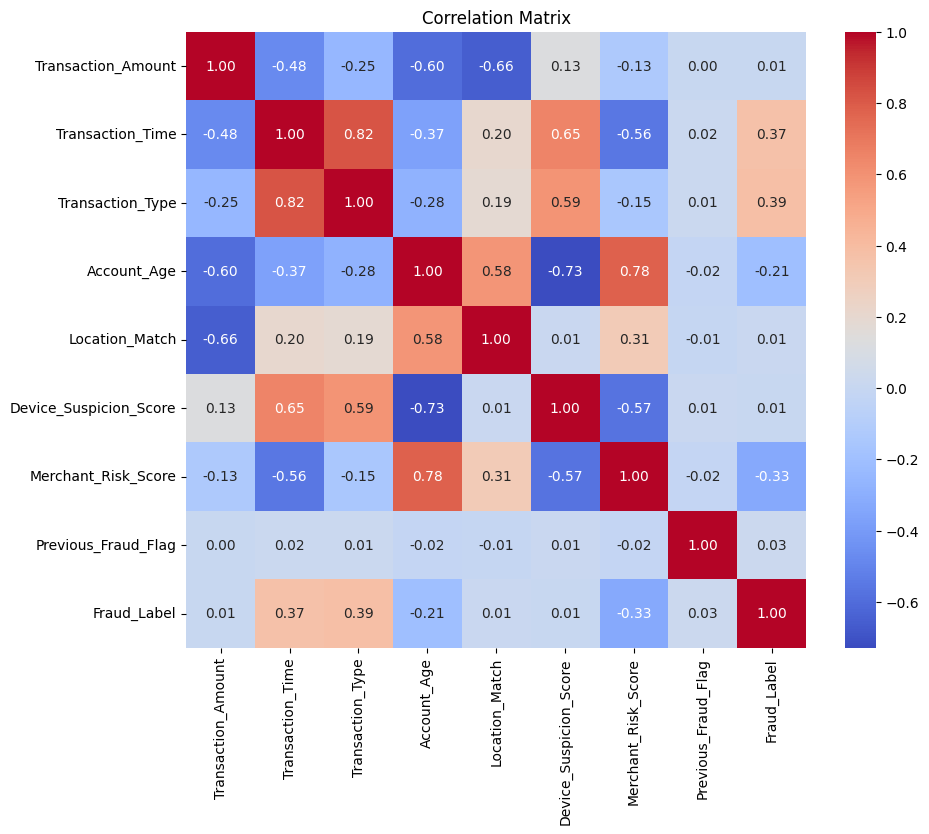

In [14]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* 2) Tree-Based Features Selection

In [15]:
# splitting the data set 
x = data.drop('Fraud_Label',axis = 1)
y = data['Fraud_Label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
features = pd.DataFrame(data.columns)
features

,0
0,Transaction_Amount
1,Transaction_Time
2,Transaction_Type
3,Account_Age
4,Location_Match
5,Device_Suspicion_Score
6,Merchant_Risk_Score
7,Previous_Fraud_Flag
8,Fraud_Label


In [17]:
# Initialize model
model = RandomForestClassifier()

# Fit model
model.fit(x, y)

# Initialize SelectFromModel
selector = SelectFromModel(model)

# Fit and transform data
x_selected = selector.fit_transform(x, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Indices: [1 2 5 6]


* 3) Laplacian Scoring Method

In [18]:
# Laplacian Score Function
def laplacian_score(X):
    # Normalize features
    X = MinMaxScaler().fit_transform(X)

    # Construct weight matrix using k-nearest neighbors
    W = kneighbors_graph(X, n_neighbors=5, mode='connectivity', include_self=True).toarray()
    
    # Diagonal degree matrix
    D = np.diag(W.sum(axis=1))
    
    # Laplacian matrix: L = D - W
    L = D - W

    # Feature-wise score
    scores = []
    for i in range(X.shape[1]):
        f = X[:, i]
        f_prime = f - (np.dot(D, f) / D.sum())
        numerator = np.dot(np.dot(f_prime.T, L), f_prime)
        denominator = np.dot(np.dot(f_prime.T, D), f_prime)
        scores.append(numerator / denominator)

    return np.array(scores)

# Load sample data
# Calculate Laplacian scores for each feature
scores = laplacian_score(x)

# Rank features based on Laplacian scores (lower score is better)
ranked_features = np.argsort(scores)

# Select top k features
k = 5  # Adjust k to select more or fewer features
selected_features = ranked_features[:k]

print(f"Laplacian Scores for each feature: {scores}")
print(f"Ranked features: {ranked_features}")
print(f"Selected top {k} features: {selected_features}")

Laplacian Scores for each feature: [0.00336796 0.00280385 0.00393164 0.00189158 0.00460723 0.002798
 0.0020824  0.00542943]
Ranked features: [3 6 5 1 0 2 4 7]
Selected top 5 features: [3 6 5 1 0]


#### Training of Models 

In [19]:
# Separate features from the target column
X = data.drop(columns=['Location_Match','Previous_Fraud_Flag','Fraud_Label'])

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Visualization function for clusters
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='coolwarm', alpha=0.7)
    plt.title(title)
    plt.xlabel('Scaled Component 1')
    plt.ylabel('Scaled Component 2')
    plt.show()

* 1) Kmeans Clustering 

In [21]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_pca)

In [22]:
label_data = pd.DataFrame(kmeans_labels).value_counts(normalize=True)
label_data

1    0.523
0    0.477
Name: proportion, dtype: float64

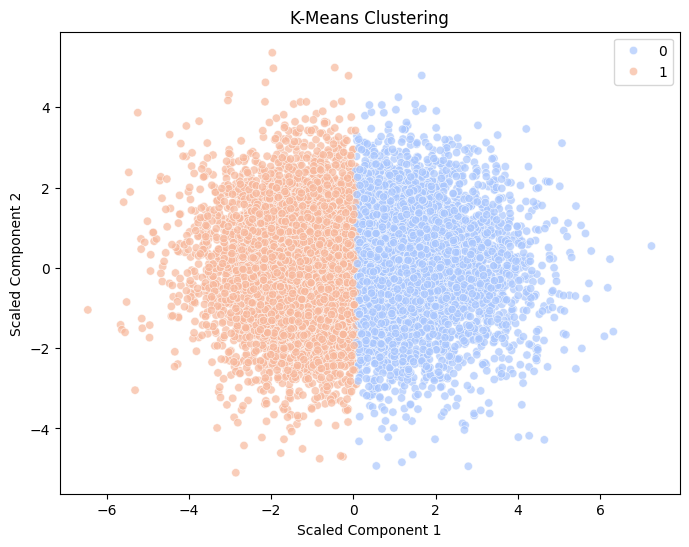

In [23]:
# Plot K-Means clusters
plot_clusters(X_pca, kmeans_labels, "K-Means Clustering")

In [24]:
# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_pca, kmeans_labels)
# Print evaluation results
print("K-Means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}\n")

K-Means Clustering:
Silhouette Score: 0.3030885250907175
Davies-Bouldin Index: 1.2401871496198291



* 2) DBSCAN Clustering 

In [25]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=175)
dbscan_labels = dbscan.fit_predict(X_pca)

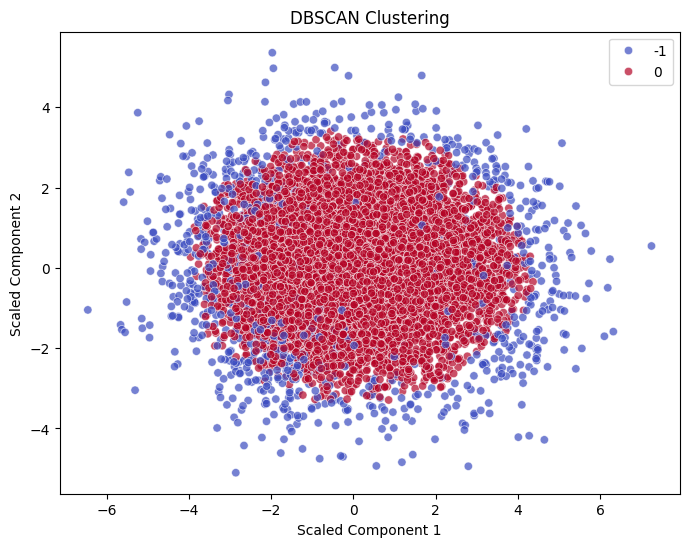

In [26]:
# Plot DBSCAN clusters
plot_clusters(X_pca, dbscan_labels, "DBSCAN Clustering")


In [27]:
label_data2 = pd.DataFrame(dbscan_labels).value_counts(normalize=True)
label_data2

 0    0.8927
-1    0.1073
Name: proportion, dtype: float64

In [28]:
# Evaluation of DBSCAN Clustering
dbscan_silhouette = silhouette_score(X_pca, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(X_pca, dbscan_labels)
print("DBSCAN Clustering:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies-Bouldin Index: {dbscan_davies_bouldin}")

DBSCAN Clustering:
Silhouette Score: 0.3007444657740982
Davies-Bouldin Index: 7.308534030525133


* 3) Agglomerative Clustering 

In [29]:
# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_pca)

In [30]:
label_data3 = pd.DataFrame(agglo_labels).value_counts(normalize=True)
label_data3

0    0.5133
1    0.4867
Name: proportion, dtype: float64

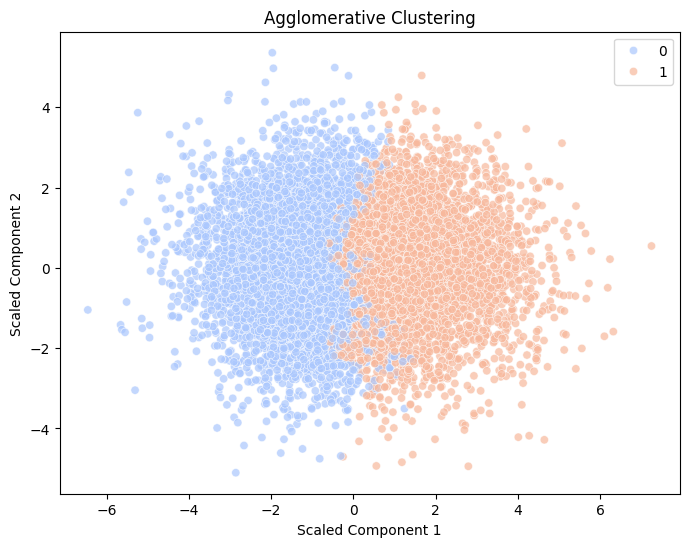

In [31]:
# Plot Agglomerative Clustering clusters
plot_clusters(X_pca, agglo_labels, "Agglomerative Clustering")

In [32]:
# Evaluate Agglomerative Clustering
agglo_silhouette = silhouette_score(X_pca, agglo_labels)
agglo_davies_bouldin = davies_bouldin_score(X_pca, agglo_labels)
print("Agglomerative Clustering:")
print(f"Silhouette Score: {agglo_silhouette}")
print(f"Davies-Bouldin Index: {agglo_davies_bouldin}")

Agglomerative Clustering:
Silhouette Score: 0.285281226627678
Davies-Bouldin Index: 1.2885530432314436


* 4) Gaussian Mixture Clustering 

In [33]:
GM_model = GaussianMixture(n_components=2,random_state=42) 
GM_model.fit(X_pca)

GaussianMixture(n_components=2, random_state=42)

In [34]:
# Output the Predicted Labels
GM_pred = GM_model.predict(X_pca)

In [35]:
label_data4 = pd.DataFrame(GM_pred).value_counts(normalize=True)
label_data4

1    0.9003
0    0.0997
Name: proportion, dtype: float64

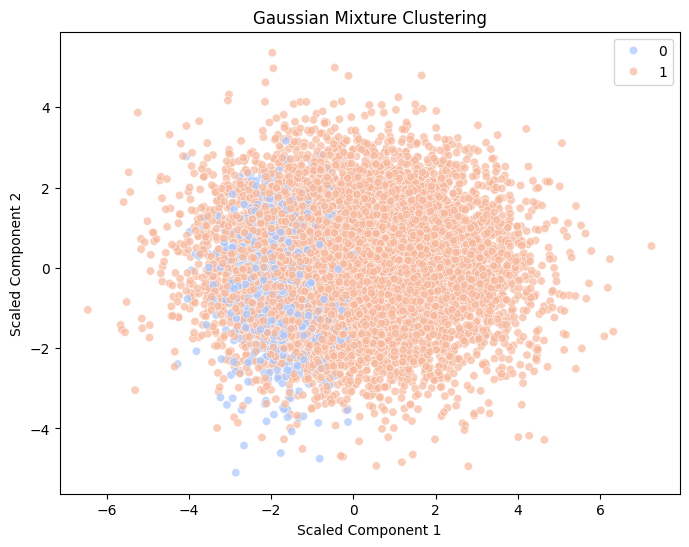

In [36]:
# Plot Gaussian Mixture Clustering 
plot_clusters(X_pca, GM_pred, "Gaussian Mixture Clustering")

In [37]:
# Evaluate Gaussian Mixture Clustering
GM_silhouette = silhouette_score(X_pca, GM_pred)
GM_davies_bouldin = davies_bouldin_score(X_pca, GM_pred)
print("Agglomerative Clustering:")
print(f"Silhouette Score: {GM_silhouette}")
print(f"Davies-Bouldin Index: {GM_davies_bouldin}")

Agglomerative Clustering:
Silhouette Score: 0.13404994691498906
Davies-Bouldin Index: 1.7614275731214648
